C:\Users\Raeds\AppData\Local\Temp\ipykernel_15104\4222643311.py:93: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



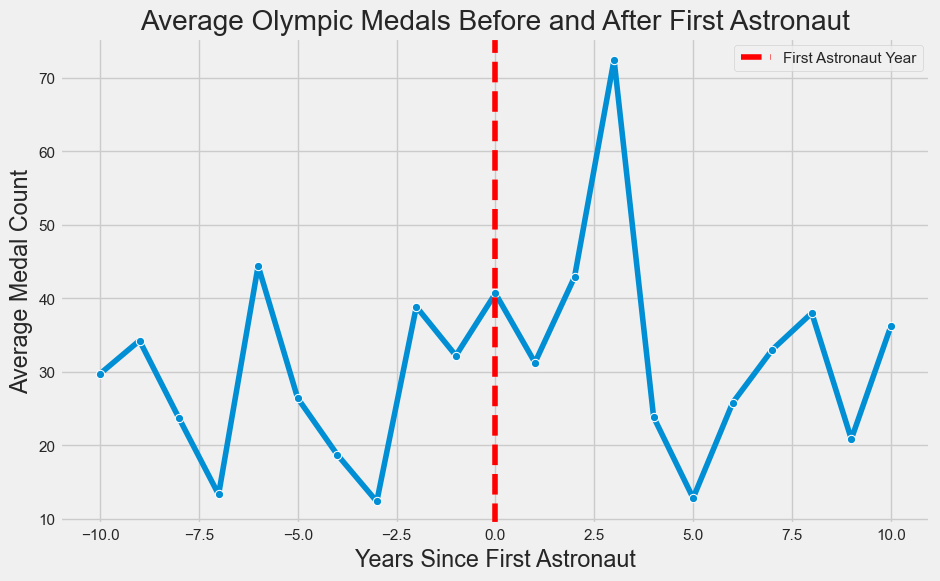

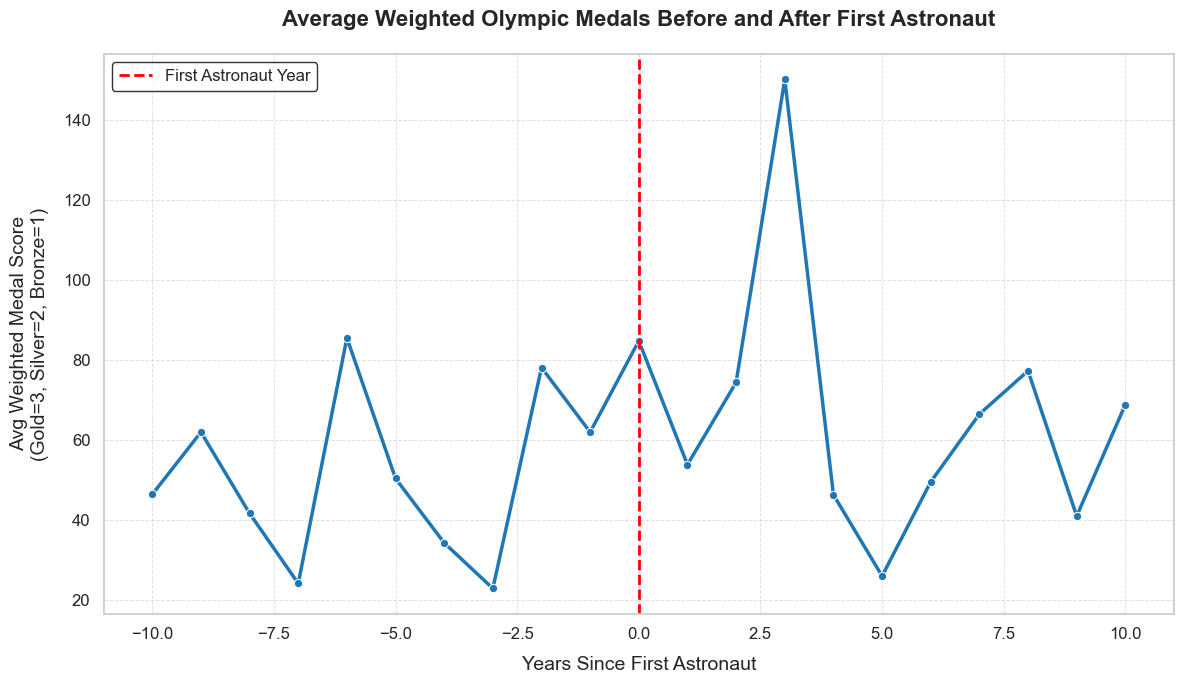

In [131]:

import pandas as pd
import seaborn as sns
from datascience import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import re


Social_df = pd.read_csv("Social_Science.csv")



import pandas as pd

# Load the social science dataset
social_df = pd.read_csv("Social_Science.csv")

# Get the first astronaut year per country
first_astronaut_year = (
    social_df.groupby("Profile.Nationality")["Mission.Year"]
    .min()
    .reset_index()
    .rename(columns={"Profile.Nationality": "Country", "Mission.Year": "First_Astronaut_Year"})
)

first_astronaut_year




medals_df = pd.read_csv("athlete_events.csv")


# Keep only rows with medals
medals_only = medals_df.dropna(subset=["Medal"])

# Aggregate medals by country (Team) and Year
medals_by_country_year = (
    medals_only.groupby(["Team", "Year"])["Medal"]
    .count()
    .reset_index()
    .rename(columns={"Medal": "Medal_Count"})
)

medals_by_country_year

merged = medals_by_country_year.merge(
    first_astronaut_year,
    left_on="Team",   # Olympic dataset country names
    right_on="Country",  # Astronaut dataset country names
    how="inner"
)

# Calculate years since first astronaut
merged["Years_Since_Astronaut"] = merged["Year"] - merged["First_Astronaut_Year"]

# Focus on ±10 year window
event_window = merged[
    (merged["Years_Since_Astronaut"] >= -10) &
    (merged["Years_Since_Astronaut"] <= 10)
]



import seaborn as sns
import matplotlib.pyplot as plt

avg_medals = (
    event_window.groupby("Years_Since_Astronaut")["Medal_Count"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_medals, x="Years_Since_Astronaut", y="Medal_Count", marker="o")
plt.axvline(0, color="red", linestyle="--", label="First Astronaut Year")
plt.title("Average Olympic Medals Before and After First Astronaut")
plt.xlabel("Years Since First Astronaut")
plt.ylabel("Average Medal Count")
plt.legend()
#plt.show()


# Define medal weights
medal_weights = {"Gold": 3, "Silver": 2, "Bronze": 1}

# Apply weights
medals_only["Medal_Score"] = medals_only["Medal"].map(medal_weights)


# Aggregate weighted medal scores by country and year
medals_weighted = (
    medals_only.groupby(["Team", "Year"])["Medal_Score"]
    .sum()
    .reset_index()
    .rename(columns={"Medal_Score": "Weighted_Medal_Score"})
)



merged = medals_weighted.merge(
    first_astronaut_year,
    left_on="Team",
    right_on="Country",
    how="inner"
)

merged["Years_Since_Astronaut"] = merged["Year"] - merged["First_Astronaut_Year"]

event_window = merged[
    (merged["Years_Since_Astronaut"] >= -10) &
    (merged["Years_Since_Astronaut"] <= 10)
]



avg_medals = (
    event_window.groupby("Years_Since_Astronaut")["Weighted_Medal_Score"]
    .mean()
    .reset_index()
)



#Cleaner Graph
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nicer style
sns.set_theme(style="whitegrid")

# Compute average weighted medals around astronaut year
avg_medals = (
    event_window.groupby("Years_Since_Astronaut")["Weighted_Medal_Score"]
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(12,7))
sns.lineplot(
    data=avg_medals,
    x="Years_Since_Astronaut",
    y="Weighted_Medal_Score",
    marker="o",
    linewidth=2.5,
    color="#1f77b4"  # clean blue tone
)

# Add vertical line at astronaut year
plt.axvline(0, color="red", linestyle="--", linewidth=2, label="First Astronaut Year")

# Title and labels with better formatting
plt.title(
    "Average Weighted Olympic Medals Before and After First Astronaut",
    fontsize=16,
    fontweight="bold",
    pad=20
)
plt.xlabel("Years Since First Astronaut", fontsize=14, labelpad=10)
plt.ylabel("Avg Weighted Medal Score\n(Gold=3, Silver=2, Bronze=1)", fontsize=14, labelpad=10)

# Add subtle background grid
plt.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.6)

# Tweak ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legend styling
plt.legend(frameon=True, fontsize=12, loc="upper left", edgecolor="black")

# Tight layout
plt.tight_layout()
plt.show()




In [134]:
case_countries = ["United States", "China", "Japan", "Brazil"]

# Merge GDP with first astronaut year
gdp_merged = gdp_long.merge(
    first_astronaut_year,
    left_on="Country Name",
    right_on="Country",
    how="inner"
)

# Calculate years since first astronaut
gdp_merged["Years_Since_Astronaut"] = gdp_merged["Year"] - gdp_merged["First_Astronaut_Year"]

# Focus on ±10 year window
gdp_event_window = gdp_merged[
    (gdp_merged["Years_Since_Astronaut"] >= -10) &
    (gdp_merged["Years_Since_Astronaut"] <= 10)
]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

for country in case_countries:
    country_data = gdp_event_window[gdp_event_window["Country Name"] == country]
    
    avg_gdp = (
        country_data.groupby("Years_Since_Astronaut")["GDP_per_capita"]
        .mean()
        .reset_index()
    )
    
    plt.figure(figsize=(10,6))
    sns.lineplot(
        data=avg_gdp,
        x="Years_Since_Astronaut",
        y="GDP_per_capita",
        marker="o",
        linewidth=2.5,
        color="green"
    )
    
    plt.axvline(0, color="red", linestyle="--", linewidth=2, label="First Astronaut Year")
    plt.title(
        f"{country}: GDP per Capita Before and After First Astronaut",
        fontsize=15,
        fontweight="bold",
        pad=20
    )
    plt.xlabel("Years Since First Astronaut", fontsize=13)
    plt.ylabel("GDP per Capita (USD)", fontsize=13)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(fontsize=12, loc="upper left")
    plt.tight_layout()
    plt.show()


NameError: name 'gdp_long' is not defined

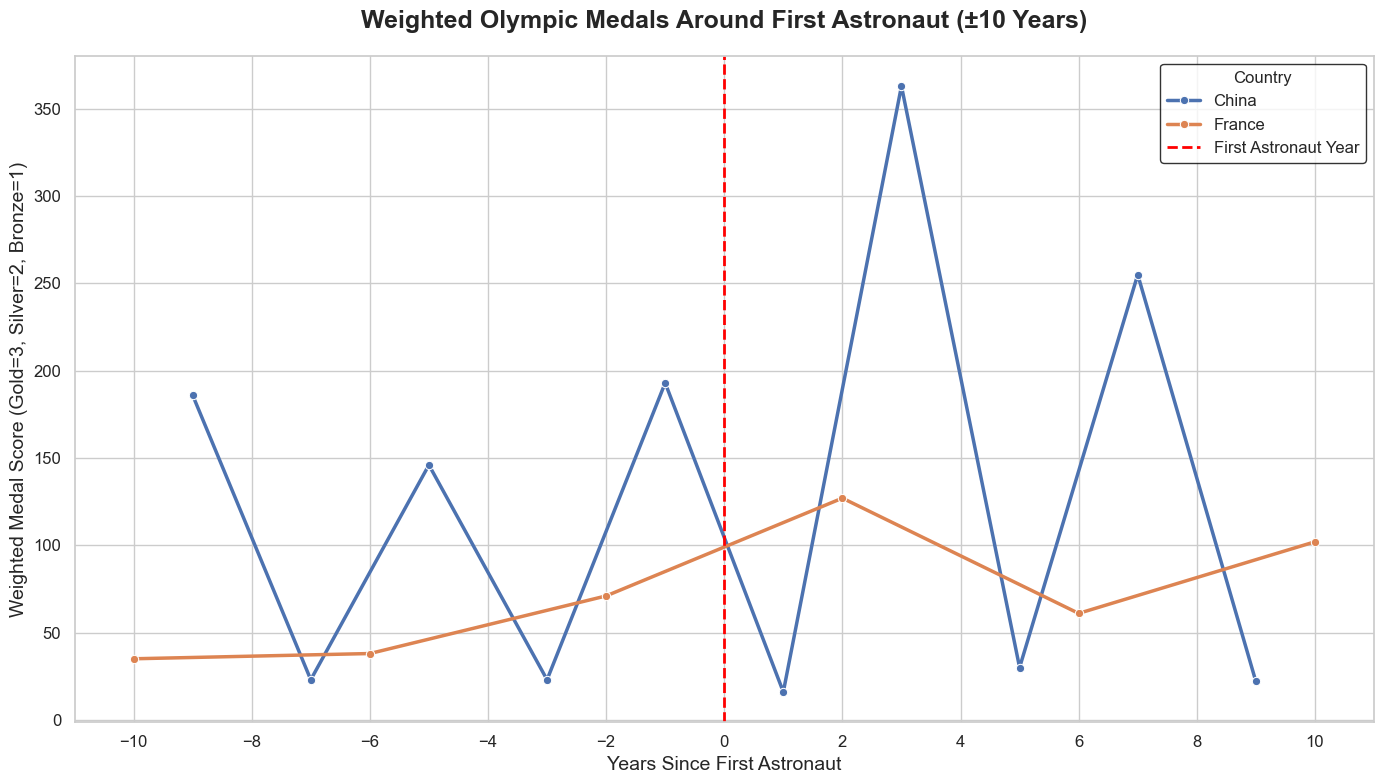

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Filter countries of interest
# ---------------------------
countries_of_interest = ["United States", "Russia", "China", "United Kingdom", "France"]

# Filter astronaut data
social_df = pd.read_csv("Social_Science.csv")
social_df = social_df[social_df["Profile.Nationality"].isin(countries_of_interest)]

# First astronaut year per country
first_astronaut_year = (
    social_df.groupby("Profile.Nationality")["Mission.Year"]
    .min()
    .reset_index()
    .rename(columns={"Profile.Nationality": "Country", "Mission.Year": "First_Astronaut_Year"})
)

# Filter Olympic medals data
medals_df = pd.read_csv("athlete_events.csv")
medals_df = medals_df[medals_df["Team"].isin(countries_of_interest)]

# Weighted medal scores
medals_only = medals_df.dropna(subset=["Medal"]).copy()
medal_weights = {"Gold":3, "Silver":2, "Bronze":1}
medals_only["Weighted_Medal_Score"] = medals_only["Medal"].map(medal_weights)

# Aggregate by country and year
medals_weighted = (
    medals_only.groupby(["Team","Year"])["Weighted_Medal_Score"]
    .sum()
    .reset_index()
    .rename(columns={"Team":"Country"})
)

# Merge with first astronaut year
merged = medals_weighted.merge(first_astronaut_year, on="Country", how="inner")
merged["Years_Since_Astronaut"] = merged["Year"] - merged["First_Astronaut_Year"]

# Focus on ±10 years
event_window = merged[(merged["Years_Since_Astronaut"]>=-10) & (merged["Years_Since_Astronaut"]<=10)]

# ---------------------------
# Plotting
# ---------------------------
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,8))

# Plot each country with trend line
for country in countries_of_interest:
    country_data = event_window[event_window["Country"]==country]
    # If empty, skip
    if country_data.empty:
        continue
    # Line plot with marker
    sns.lineplot(
        x="Years_Since_Astronaut",
        y="Weighted_Medal_Score",
        data=country_data,
        marker="o",
        linewidth=2.5,
        label=country
    )

# Add vertical line at astronaut year
plt.axvline(0, color="red", linestyle="--", linewidth=2, label="First Astronaut Year")

# Titles and labels
plt.title("Weighted Olympic Medals Around First Astronaut (±10 Years)", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Years Since First Astronaut", fontsize=14)
plt.ylabel("Weighted Medal Score (Gold=3, Silver=2, Bronze=1)", fontsize=14)
plt.xticks(range(-10,11,2), fontsize=12)
plt.yticks(fontsize=12)

# Legend
plt.legend(title="Country", frameon=True, edgecolor="black", fontsize=12)

plt.tight_layout()
plt.show()


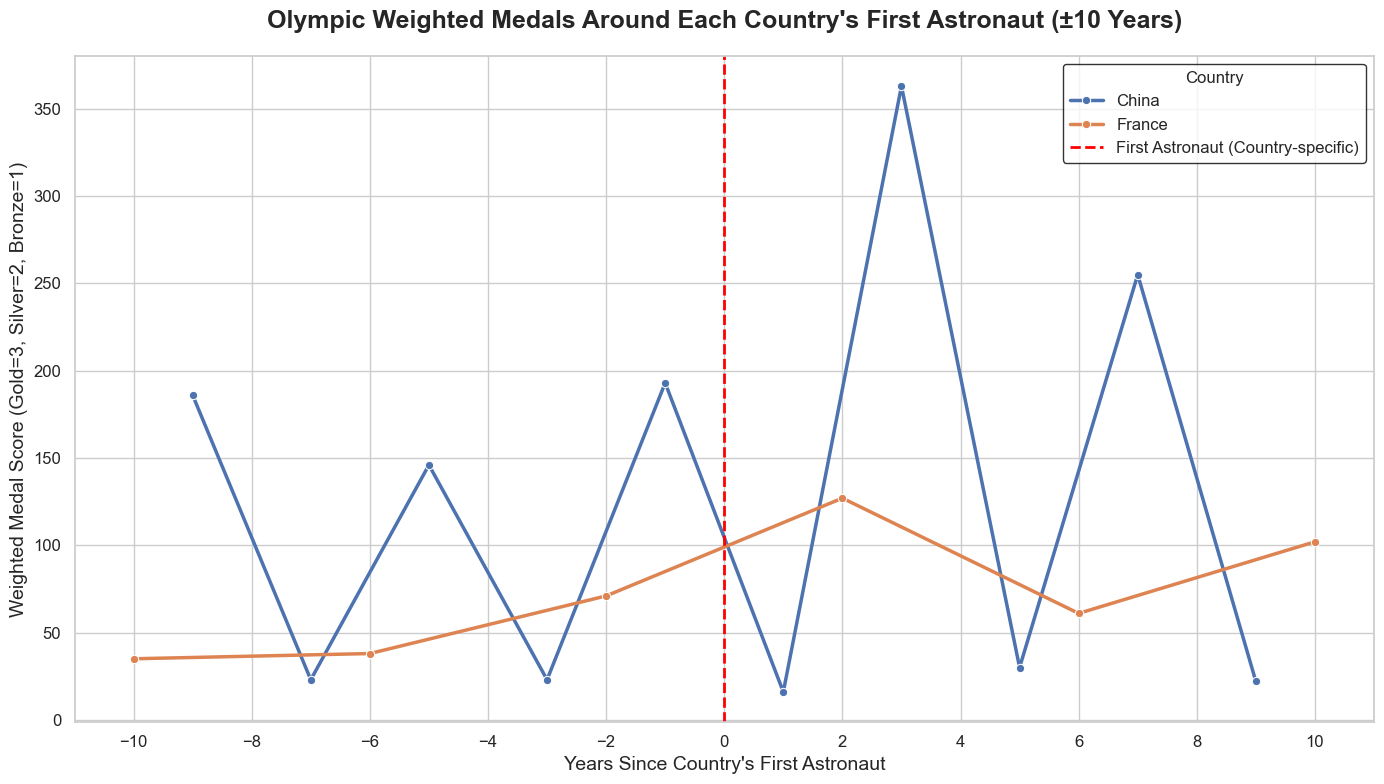

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load datasets
# ---------------------------
social_df = pd.read_csv("Social_Science.csv")
medals_df = pd.read_csv("athlete_events.csv")

# ---------------------------
# Choose countries for visualization
# Reason: countries with historically strong Olympic performance and early space programs
# ---------------------------
countries_of_interest = ["United States", "Russia", "China", "United Kingdom", "France"]

# ---------------------------
# First astronaut year per country
# ---------------------------
first_astronaut_year = (
    social_df.groupby("Profile.Nationality")["Mission.Year"]
    .min()
    .reset_index()
    .rename(columns={"Profile.Nationality": "Country", "Mission.Year": "First_Astronaut_Year"})
)
first_astronaut_year = first_astronaut_year[first_astronaut_year["Country"].isin(countries_of_interest)]

# ---------------------------
# Weighted Olympic medals
# ---------------------------
medals_only = medals_df.dropna(subset=["Medal"]).copy()
medal_weights = {"Gold":3, "Silver":2, "Bronze":1}
medals_only["Weighted_Medal_Score"] = medals_only["Medal"].map(medal_weights)

# Aggregate medals by country and year
medals_weighted = (
    medals_only.groupby(["Team","Year"])["Weighted_Medal_Score"]
    .sum()
    .reset_index()
    .rename(columns={"Team":"Country"})
)

# Filter for chosen countries
medals_weighted = medals_weighted[medals_weighted["Country"].isin(countries_of_interest)]

# ---------------------------
# Merge datasets
# ---------------------------
merged = medals_weighted.merge(first_astronaut_year, on="Country", how="inner")

# Calculate years since each country’s first astronaut
merged["Years_Since_Astronaut"] = merged["Year"] - merged["First_Astronaut_Year"]

# Focus on ±10 year window
event_window = merged[(merged["Years_Since_Astronaut"] >= -10) & (merged["Years_Since_Astronaut"] <= 10)]

# ---------------------------
# Plotting
# ---------------------------
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,8))

for country in countries_of_interest:
    country_data = event_window[event_window["Country"]==country]
    if country_data.empty:
        continue
    sns.lineplot(
        x="Years_Since_Astronaut",
        y="Weighted_Medal_Score",
        data=country_data,
        marker="o",
        linewidth=2.5,
        label=country
    )

# Vertical line at Year 0 for first astronaut
plt.axvline(0, color="red", linestyle="--", linewidth=2, label="First Astronaut (Country-specific)")

# Titles and labels
plt.title("Olympic Weighted Medals Around Each Country's First Astronaut (±10 Years)", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Years Since Country's First Astronaut", fontsize=14)
plt.ylabel("Weighted Medal Score (Gold=3, Silver=2, Bronze=1)", fontsize=14)
plt.xticks(range(-10,11,2), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Country", frameon=True, edgecolor="black", fontsize=12)
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd

# ---------------------------
# Load datasets
# ---------------------------
social_df = pd.read_csv("Social_Science.csv")
medals_df = pd.read_csv("athlete_events.csv")

# ---------------------------
# Define a country mapping to standardize names
# ---------------------------
country_map = {
    "U.S.": "United States",
    "USA": "United States",
    "U.S.S.R/Russia": "Russia",
    "Soviet Union": "Russia",
    "U.K.": "United Kingdom",
    "UK": "United Kingdom",
    "Great Britain": "United Kingdom",
    "PRC": "China",
    "People's Republic of China": "China",
    # Add more if needed
}

# ---------------------------
# Apply standardization
# ---------------------------
social_df["Profile.Nationality"] = social_df["Profile.Nationality"].replace(country_map)
medals_df["Team"] = medals_df["Team"].replace(country_map)

# ---------------------------
# Now your merge by country will work
# ---------------------------
first_astronaut_year = (
    social_df.groupby("Profile.Nationality")["Mission.Year"]
    .min()
    .reset_index()
    .rename(columns={"Profile.Nationality": "Country", "Mission.Year": "First_Astronaut_Year"})
)

medals_only = medals_df.dropna(subset=["Medal"]).copy()
medal_weights = {"Gold":3, "Silver":2, "Bronze":1}
medals_only["Weighted_Medal_Score"] = medals_only["Medal"].map(medal_weights)

medals_weighted = (
    medals_only.groupby(["Team","Year"])["Weighted_Medal_Score"]
    .sum()
    .reset_index()
    .rename(columns={"Team":"Country"})
)

merged = medals_weighted.merge(first_astronaut_year, on="Country", how="inner")
merged["Years_Since_Astronaut"] = merged["Year"] - merged["First_Astronaut_Year"]

print(merged.head())


       Country  Year  Weighted_Medal_Score  First_Astronaut_Year  \
0  Afghanistan  2008                     1                  1988   
1  Afghanistan  2012                     1                  1988   
2    Australia  1896                     6                  1983   
3    Australia  1900                     9                  1983   
4    Australia  1904                     7                  1983   

   Years_Since_Astronaut  
0                     20  
1                     24  
2                    -87  
3                    -83  
4                    -79  


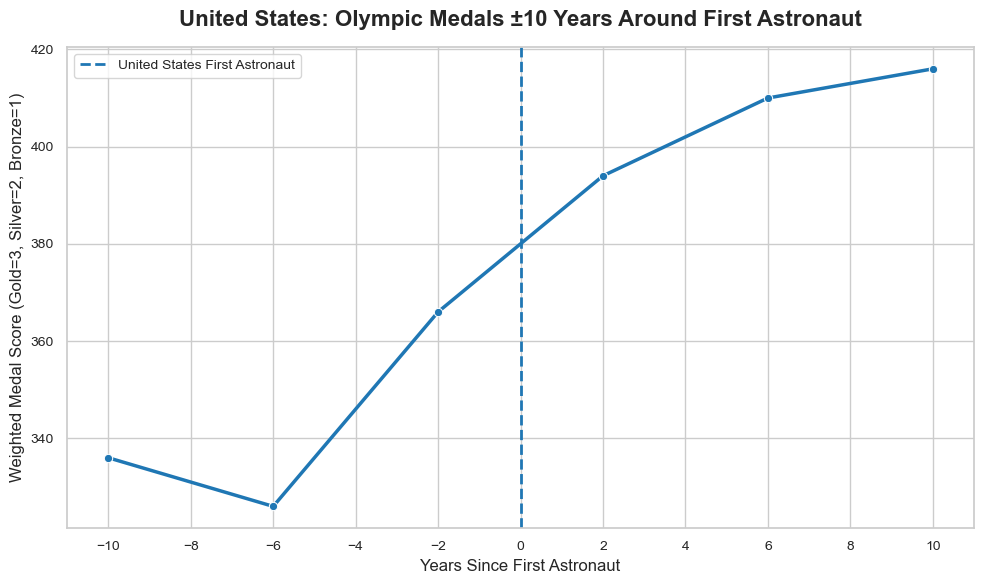

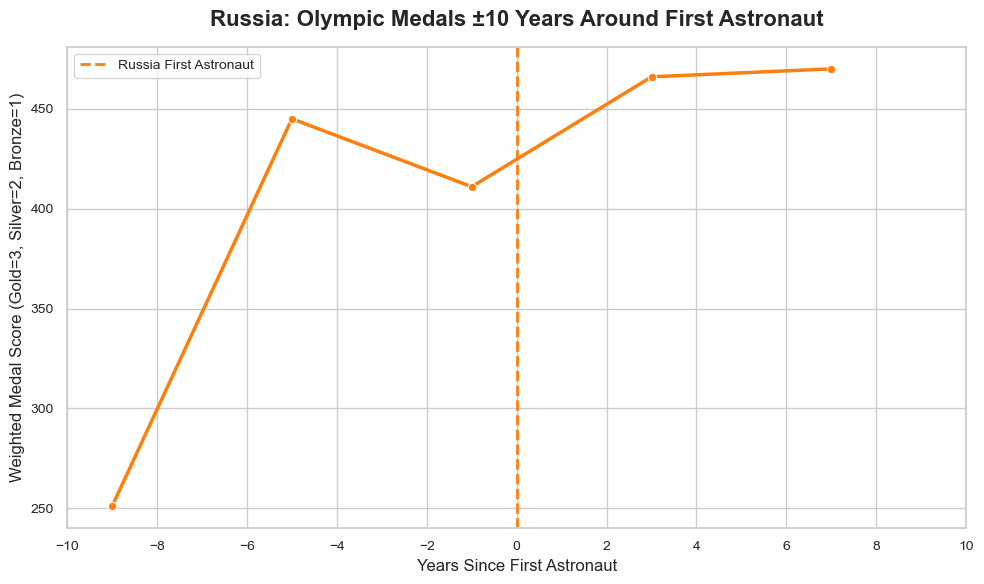

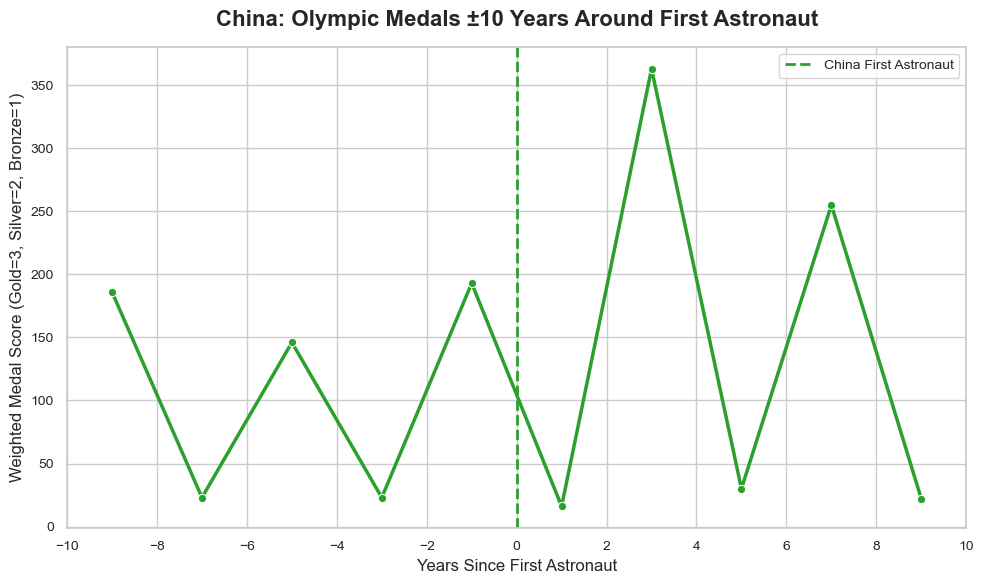

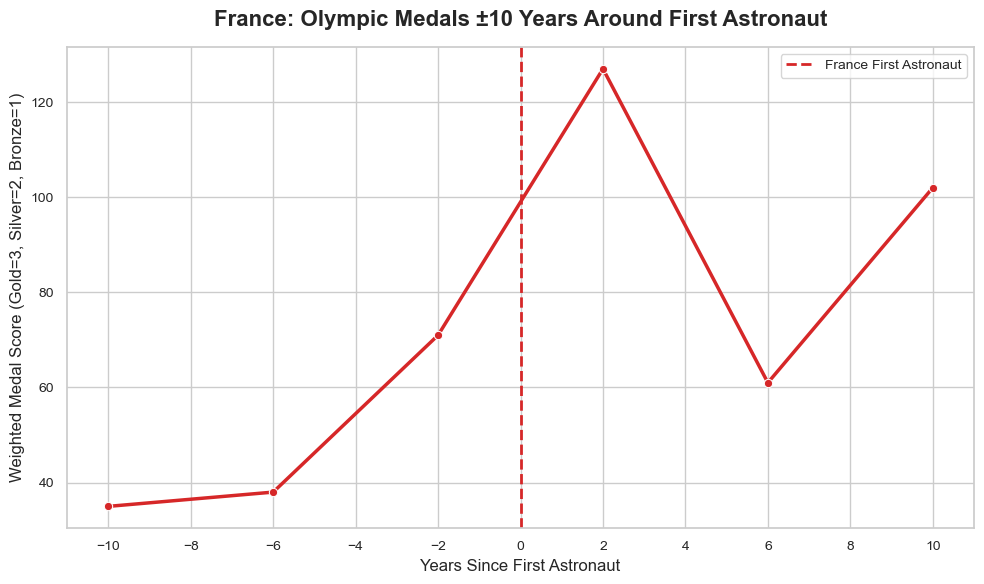

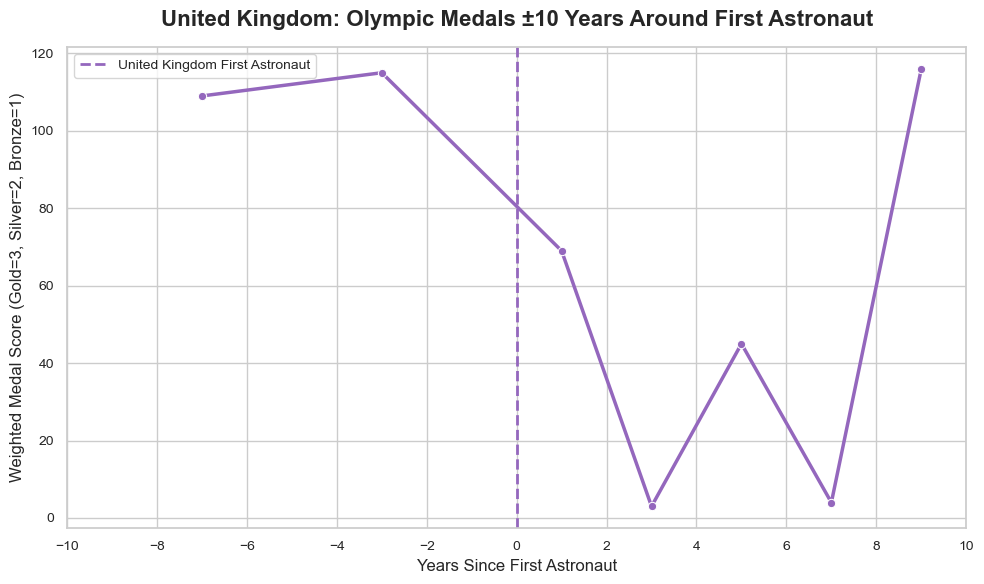

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load datasets
# ---------------------------
social_df = pd.read_csv("Social_Science.csv")
medals_df = pd.read_csv("athlete_events.csv")

# ---------------------------
# Standardize country names
# ---------------------------
country_map = {
    "U.S.": "United States",
    "USA": "United States",
    "U.S.S.R/Russia": "Russia",
    "Soviet Union": "Russia",
    "U.K.": "United Kingdom",
    "UK": "United Kingdom",
    "Great Britain": "United Kingdom",
    "PRC": "China",
    "People's Republic of China": "China",
}
social_df["Profile.Nationality"] = social_df["Profile.Nationality"].replace(country_map)
medals_df["Team"] = medals_df["Team"].replace(country_map)

# ---------------------------
# Countries of interest
# ---------------------------
countries_of_interest = ["United States", "Russia", "China", "France", "United Kingdom"]

# ---------------------------
# First astronaut year per country
# ---------------------------
first_astronaut_year = (
    social_df.groupby("Profile.Nationality")["Mission.Year"]
    .min()
    .reset_index()
    .rename(columns={"Profile.Nationality": "Country", "Mission.Year": "First_Astronaut_Year"})
)
first_astronaut_year = first_astronaut_year[first_astronaut_year["Country"].isin(countries_of_interest)]

# ---------------------------
# Weighted Olympic medals
# ---------------------------
medals_only = medals_df.dropna(subset=["Medal"]).copy()
medal_weights = {"Gold":3, "Silver":2, "Bronze":1}
medals_only["Weighted_Medal_Score"] = medals_only["Medal"].map(medal_weights)

medals_weighted = (
    medals_only.groupby(["Team","Year"])["Weighted_Medal_Score"]
    .sum()
    .reset_index()
    .rename(columns={"Team":"Country"})
)
medals_weighted = medals_weighted[medals_weighted["Country"].isin(countries_of_interest)]

# ---------------------------
# Merge datasets
# ---------------------------
merged = medals_weighted.merge(first_astronaut_year, on="Country", how="inner")
merged["Years_Since_Astronaut"] = merged["Year"] - merged["First_Astronaut_Year"]

# Focus on ±10 years
event_window = merged[(merged["Years_Since_Astronaut"] >= -10) & (merged["Years_Since_Astronaut"] <= 10)]

# ---------------------------
# Plotting: separate plots per country
# ---------------------------
sns.set_theme(style="whitegrid")
palette = sns.color_palette("tab10", len(countries_of_interest))

for i, country in enumerate(countries_of_interest):
    country_data = event_window[event_window["Country"]==country]
    if country_data.empty:
        continue
    
    plt.figure(figsize=(10,6))
    sns.lineplot(
        x="Years_Since_Astronaut",
        y="Weighted_Medal_Score",
        data=country_data,
        marker="o",
        linewidth=2.5,
        color=palette[i]
    )
    
    # Vertical dashed line at first astronaut
    plt.axvline(0, color=palette[i], linestyle="--", linewidth=2, label=f"{country} First Astronaut")
    
    # Titles and labels
    plt.title(f"{country}: Olympic Medals ±10 Years Around First Astronaut", fontsize=16, fontweight="bold", pad=15)
    plt.xlabel("Years Since First Astronaut", fontsize=12)
    plt.ylabel("Weighted Medal Score (Gold=3, Silver=2, Bronze=1)", fontsize=12)
    plt.xticks(range(-10,11,2), fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()


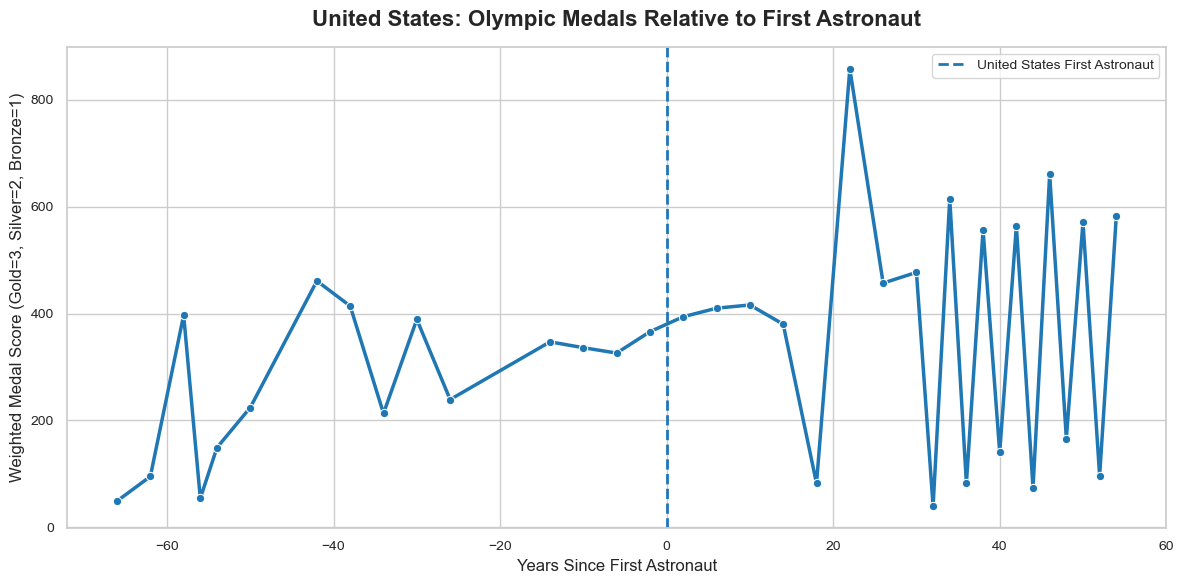

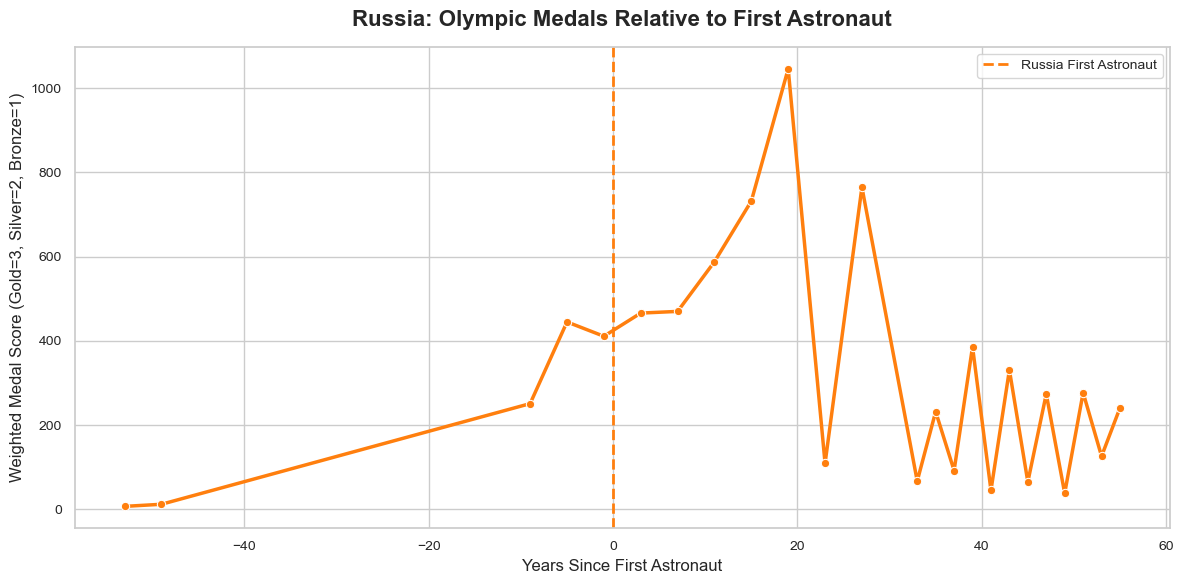

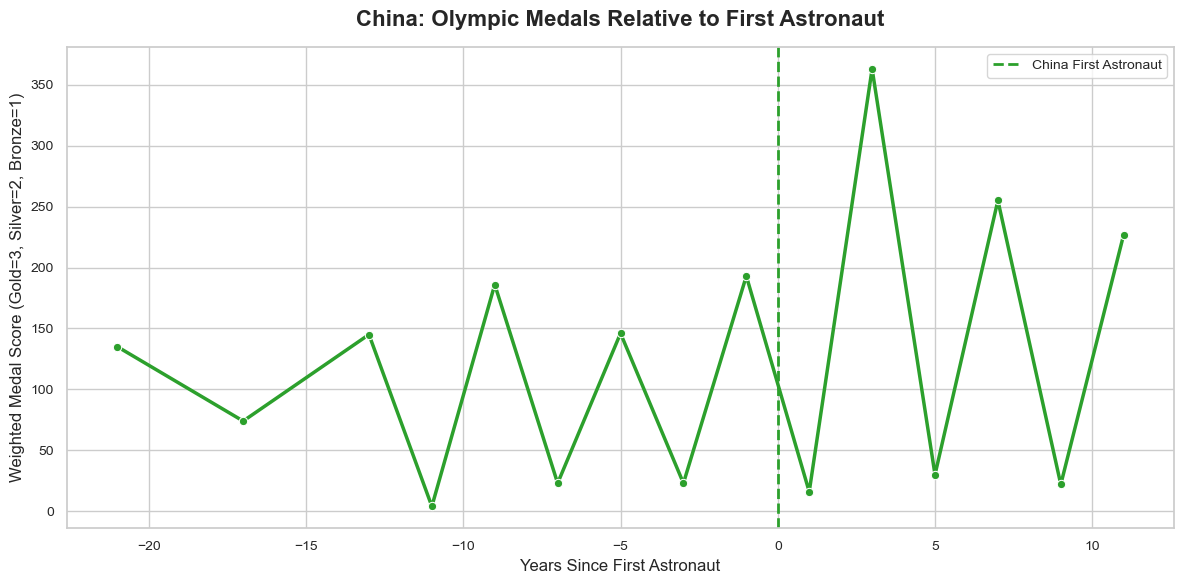

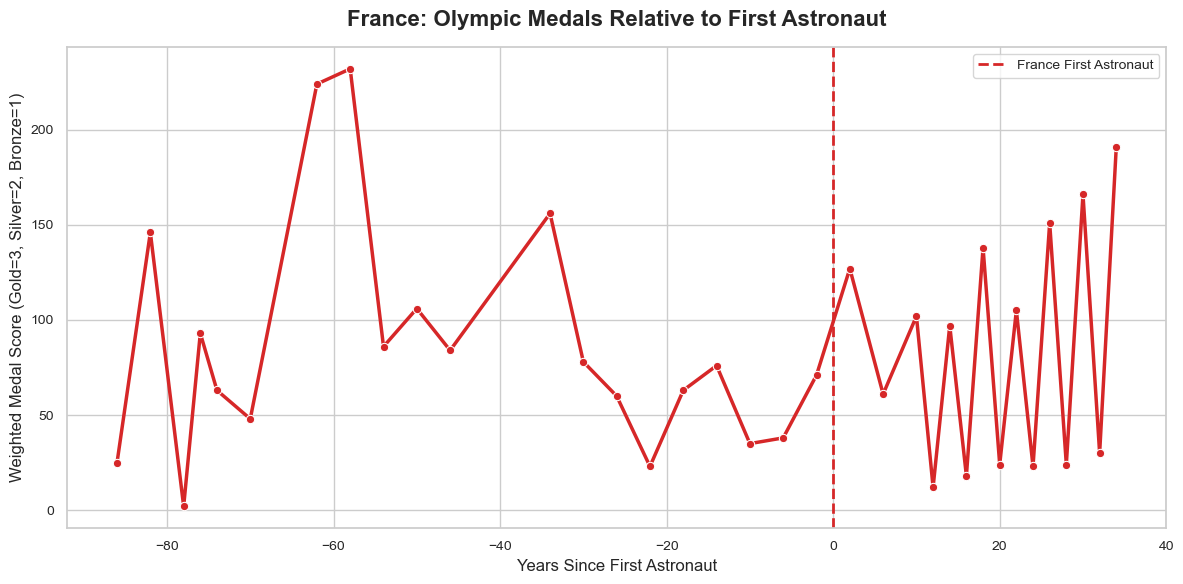

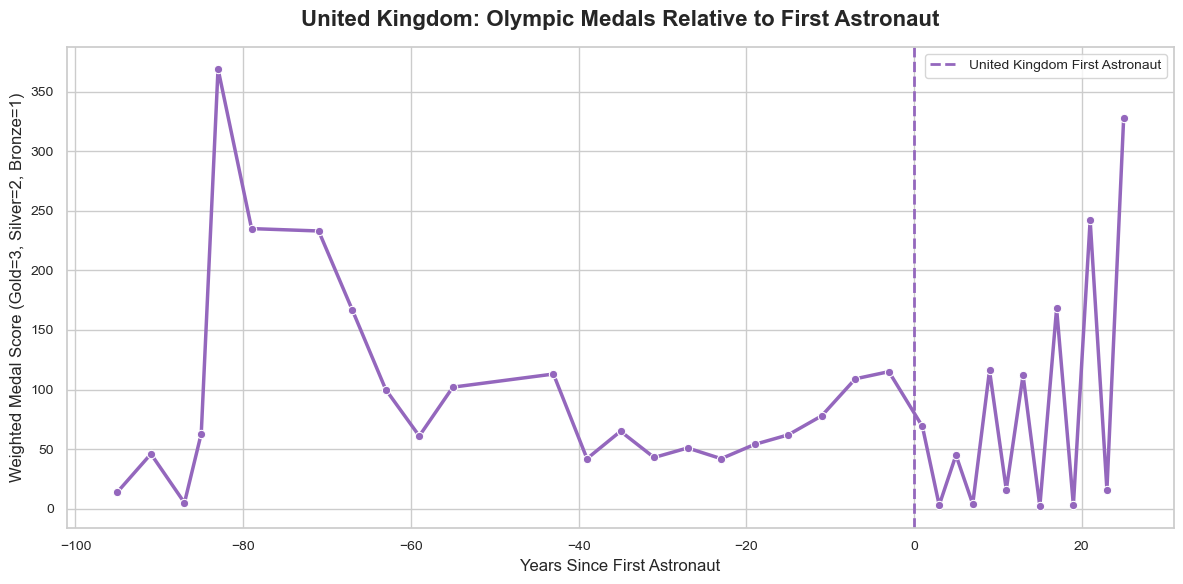

In [33]:
# ---------------------------
# Plotting: separate plots per country, full range
# ---------------------------
sns.set_theme(style="whitegrid")
palette = sns.color_palette("tab10", len(countries_of_interest))

for i, country in enumerate(countries_of_interest):
    country_data = merged[merged["Country"]==country]  # Full timeline, including before first astronaut
    if country_data.empty:
        continue
    
    plt.figure(figsize=(12,6))
    sns.lineplot(
        x="Years_Since_Astronaut",
        y="Weighted_Medal_Score",
        data=country_data,
        marker="o",
        linewidth=2.5,
        color=palette[i]
    )
    
    # Vertical dashed line at first astronaut (year 0)
    plt.axvline(0, color=palette[i], linestyle="--", linewidth=2, label=f"{country} First Astronaut")
    
    # Titles and labels
    plt.title(f"{country}: Olympic Medals Relative to First Astronaut", fontsize=16, fontweight="bold", pad=15)
    plt.xlabel("Years Since First Astronaut", fontsize=12)
    plt.ylabel("Weighted Medal Score (Gold=3, Silver=2, Bronze=1)", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()


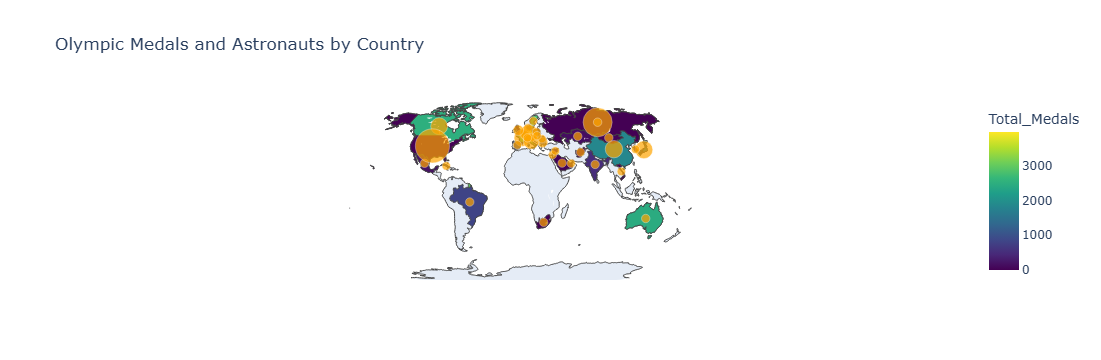

In [59]:
import pandas as pd
import numpy as np
import plotly.express as px

# ---------------------------
# Load your datasets
# ---------------------------
# medals_df: athlete_events.csv
# astronauts_df: Social_Science.csv

medals_df = pd.read_csv("athlete_events.csv")
astronauts_df = pd.read_csv("Social_Science.csv")

# ---------------------------
# Summarize medals per country
# ---------------------------
medals_only = medals_df.dropna(subset=["Medal"]).copy()
medal_weights = {"Gold":3, "Silver":2, "Bronze":1}
medals_only["Weighted_Medal_Score"] = medals_only["Medal"].map(medal_weights)

medal_summary = (
    medals_only.groupby("Team")["Weighted_Medal_Score"]
    .sum()
    .reset_index()
    .rename(columns={"Team":"Country", "Weighted_Medal_Score":"Total_Medals"})
)

# ---------------------------
# Summarize astronauts per country
# ---------------------------
astronaut_summary = (
    astronauts_df.groupby("Profile.Nationality")["Profile.Name"]
    .nunique()
    .reset_index()
    .rename(columns={"Profile.Nationality":"Country", "Profile.Name":"Num_Astronauts"})
)

mission_summary = (
    astronauts_df.groupby("Profile.Nationality")["Profile.Lifetime Statistics.Mission count"]
    .sum()
    .reset_index()
    .rename(columns={"Profile.Nationality":"Country", "Profile.Lifetime Statistics.Mission count":"Total_Missions"})
)

# Merge astronaut summaries
country_summary = astronaut_summary.merge(mission_summary, on="Country", how="left")

# Merge medals and astronauts
country_summary = country_summary.merge(medal_summary, on="Country", how="left").fillna(0)

# ---------------------------
# Scale marker size logarithmically
# ---------------------------
country_summary["Marker_Size"] = np.log1p(country_summary["Num_Astronauts"])*5 + 5  # small -> large

# ---------------------------
# Create choropleth for medals
# ---------------------------
fig = px.choropleth(
    country_summary,
    locations="Country",
    locationmode="country names",
    color="Total_Medals",
    hover_name="Country",
    color_continuous_scale="Viridis",
    title="Olympic Medals and Astronauts by Country"
)

# ---------------------------
# Add scattergeo markers for astronauts
# ---------------------------
fig.add_scattergeo(
    locations=country_summary["Country"],
    locationmode="country names",
    text=country_summary["Num_Astronauts"],
    marker=dict(
        size=country_summary["Marker_Size"],
        color="orange",
        line_width=0.5,
        sizemode="diameter"
    ),
    name="Astronauts"
)

# ---------------------------
# Final layout tweaks
# ---------------------------
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    legend=dict(title="Legend")
)

fig.show()


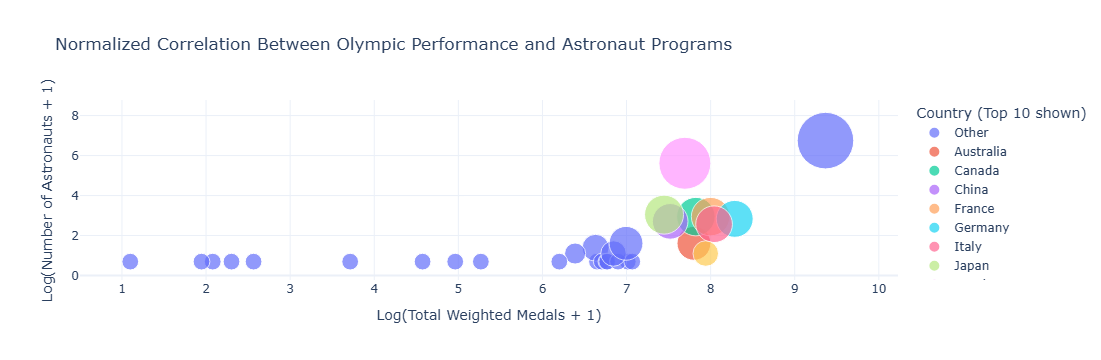

In [71]:
import pandas as pd
import plotly.express as px
import numpy as np

# ---------------------------
# Load datasets
# ---------------------------
social_df = pd.read_csv("Social_Science.csv")
medals_df = pd.read_csv("athlete_events.csv")

# ---------------------------
# Fix astronaut country names
# ---------------------------
astro_country_map = {
    "U.S.": "United States",
    "U.S.S.R/Russia": "Russia",
    "Soviet Union": "Russia",
    "UK": "Great Britain",
    "PRC/China": "China",
    "FRG/Germany": "Germany",
    "GDR/Germany": "Germany"
}
social_df["Profile.Nationality"] = social_df["Profile.Nationality"].replace(astro_country_map)

# ---------------------------
# Weighted medals
# ---------------------------
medals_only = medals_df.dropna(subset=["Medal"]).copy()
medal_weights = {"Gold":3, "Silver":2, "Bronze":1}
medals_only["Weighted_Medal_Score"] = medals_only["Medal"].map(medal_weights)

medals_summary = (
    medals_only.groupby("Team")["Weighted_Medal_Score"]
    .sum()
    .reset_index()
    .rename(columns={"Team": "Country", "Weighted_Medal_Score": "Total_Medals"})
)

# ---------------------------
# Astronaut summary
# ---------------------------
astronaut_summary = (
    social_df.groupby("Profile.Nationality")
    .agg(
        Num_Astronauts=("Profile.Name", "count"),
        Total_Missions=("Profile.Lifetime Statistics.Mission count", "sum")
    )
    .reset_index()
    .rename(columns={"Profile.Nationality": "Country"})
)

# ---------------------------
# Merge datasets
# ---------------------------
merged = pd.merge(medals_summary, astronaut_summary, on="Country", how="inner")

# ---------------------------
# Log-transform for visibility
# ---------------------------
merged["Log_Medals"] = np.log1p(merged["Total_Medals"])
merged["Log_Astronauts"] = np.log1p(merged["Num_Astronauts"])
merged["Log_Missions"] = np.log1p(merged["Total_Missions"])

# ---------------------------
# Define top countries for legend
# ---------------------------
top_countries = merged.sort_values("Total_Medals", ascending=False).head(10)["Country"].tolist()
merged["Legend_Country"] = merged["Country"].apply(lambda x: x if x in top_countries else "Other")

# ---------------------------
# Scatter plot
# ---------------------------
fig = px.scatter(
    merged,
    x="Log_Medals",
    y="Log_Astronauts",
    size="Log_Missions",
    color="Legend_Country",
    hover_name="Country",
    size_max=40,
    template="plotly_white",
    title="Normalized Correlation Between Olympic Performance and Astronaut Programs"
)

fig.update_layout(
    xaxis_title="Log(Total Weighted Medals + 1)",
    yaxis_title="Log(Number of Astronauts + 1)",
    legend_title="Country (Top 10 shown)"
)

fig.show()


In [75]:
import pandas as pd

# --------------------------
# 1. Load datasets
# --------------------------
social_df = pd.read_csv("Social_Science.csv")
medals_df = pd.read_csv("athlete_events.csv")

# --------------------------
# 2. Astronaut stats per country
# --------------------------
astronaut_stats = (
    social_df.groupby("Profile.Nationality")
    .agg(
        First_Astronaut_Year=("Mission.Year", "min"),
        Astronaut_Count=("Profile.Name", "nunique"),
        Total_Missions=("Mission.Name", "nunique"),
        Total_Mission_Duration=("Mission.Durations.Mission duration", "sum"),
        Total_EVA_Duration=("Mission.Durations.EVA duration", "sum"),
    )
    .reset_index()
    .rename(columns={"Profile.Nationality": "Country"})
)

# --------------------------
# 3. Olympic stats per country
# --------------------------
olympic_stats = (
    medals_df.groupby("NOC")
    .agg(
        First_Olympic_Year=("Year", "min"),
        First_Medal_Year=(
            "Year",
            lambda x: x[medals_df.loc[x.index, "Medal"].notna()].min()
            if (medals_df.loc[x.index, "Medal"].notna()).any()
            else None,
        ),
        Medal_Count=("Medal", "count"),
        Gold_Count=("Medal", lambda x: (x == "Gold").sum()),
        Silver_Count=("Medal", lambda x: (x == "Silver").sum()),
        Bronze_Count=("Medal", lambda x: (x == "Bronze").sum()),
        Athlete_Count=("ID", "nunique"),
        Event_Count=("Event", "nunique"),
    )
    .reset_index()
)

# --------------------------
# 4. Map astronaut country names -> Olympic NOC codes
# --------------------------
country_mapping = {
    "U.S.": "USA",
    "United States": "USA",
    "U.S.S.R/Russia": "RUS",
    "Russia": "RUS",
    "Germany": "GER",
    "East Germany": "GDR",
    "West Germany": "FRG",
    "France": "FRA",
    "Japan": "JPN",
    "China": "CHN",
    "Italy": "ITA",
    "Canada": "CAN",
    "United Kingdom": "GBR",
    "Great Britain": "GBR",
    "Spain": "ESP",
    "India": "IND",
    "Brazil": "BRA",
    "Mexico": "MEX",
    "Australia": "AUS",
    "South Korea": "KOR",
    "North Korea": "PRK",
    "Czech Republic": "CZE",
    "Czechoslovakia": "TCH",
    "Poland": "POL",
    "Hungary": "HUN",
    "Romania": "ROU",
    "Sweden": "SWE",
    "Norway": "NOR",
    "Denmark": "DEN",
    "Finland": "FIN",
    "Belgium": "BEL",
    "Netherlands": "NED",
    "Switzerland": "SUI",
    "Austria": "AUT",
    # extend as you discover more in your data
}

astronaut_stats["NOC"] = astronaut_stats["Country"].map(country_mapping)

# --------------------------
# 5. Merge astronaut + Olympic stats
# --------------------------
merged_df = pd.merge(
    astronaut_stats,
    olympic_stats,
    on="NOC",
    how="inner"
)

# --------------------------
# 6. Save merged dataset
# --------------------------
merged_df.to_csv("astronauts_olympics_merged.csv", index=False)

print("✅ Merged dataset created with shape:", merged_df.shape)
print(merged_df.head())


✅ Merged dataset created with shape: (21, 15)
     Country  First_Astronaut_Year  Astronaut_Count  Total_Missions  \
0  Australia                  1983                1               4   
1    Austria                  1991                1               1   
2    Belgium                  1992                2               3   
3     Brazil                  2006                1               1   
4     Canada                  1984               10              18   

   Total_Mission_Duration  Total_EVA_Duration  NOC  First_Olympic_Year  \
0                 4264.00                6.35  AUS                1896   
1                  190.20                0.00  AUT                1896   
2                 4983.75                0.00  BEL                1900   
3                  237.28                0.00  BRA                1900   
4                17252.70               46.29  CAN                1900   

   First_Medal_Year  Medal_Count  Gold_Count  Silver_Count  Bronze_Count  \
0     

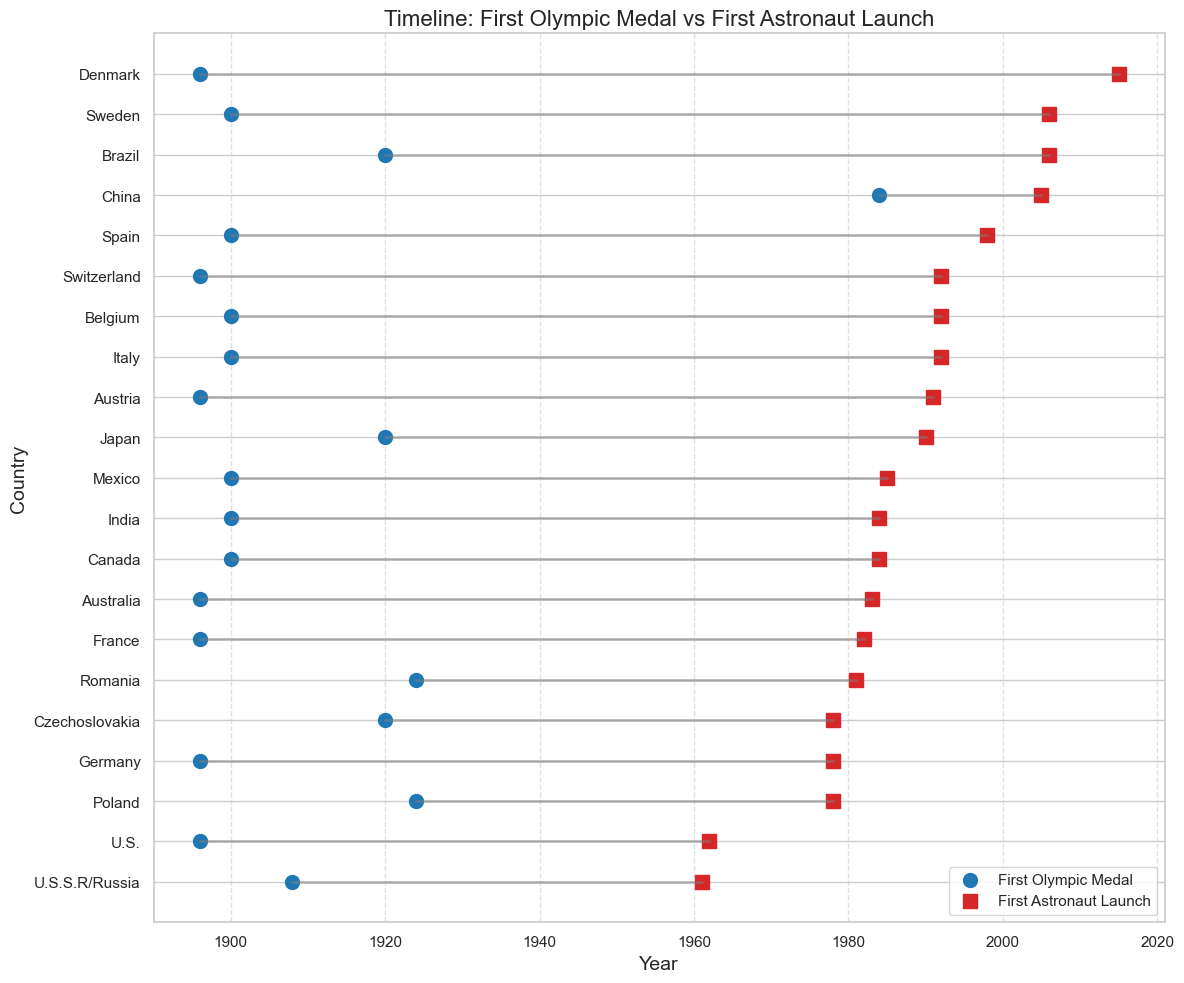

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out countries with missing data
timeline_df = merged_df.dropna(subset=["First_Astronaut_Year", "First_Medal_Year"])

# Sort by First Astronaut Year for a nicer layout
timeline_df = timeline_df.sort_values("First_Astronaut_Year")

plt.figure(figsize=(12, 10))

# Draw lines connecting the two events
for _, row in timeline_df.iterrows():
    plt.plot(
        [row["First_Medal_Year"], row["First_Astronaut_Year"]],
        [row["Country"], row["Country"]],
        color="gray", alpha=0.5, linewidth=2
    )

# Plot first Olympic medal as blue circle
plt.scatter(
    timeline_df["First_Medal_Year"],
    timeline_df["Country"],
    color="tab:blue",
    s=100,
    label="First Olympic Medal"
)

# Plot first astronaut launch as red square
plt.scatter(
    timeline_df["First_Astronaut_Year"],
    timeline_df["Country"],
    color="tab:red",
    s=100,
    marker="s",
    label="First Astronaut Launch"
)

# Labels, legend, and styling
plt.title("Timeline: First Olympic Medal vs First Astronaut Launch", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


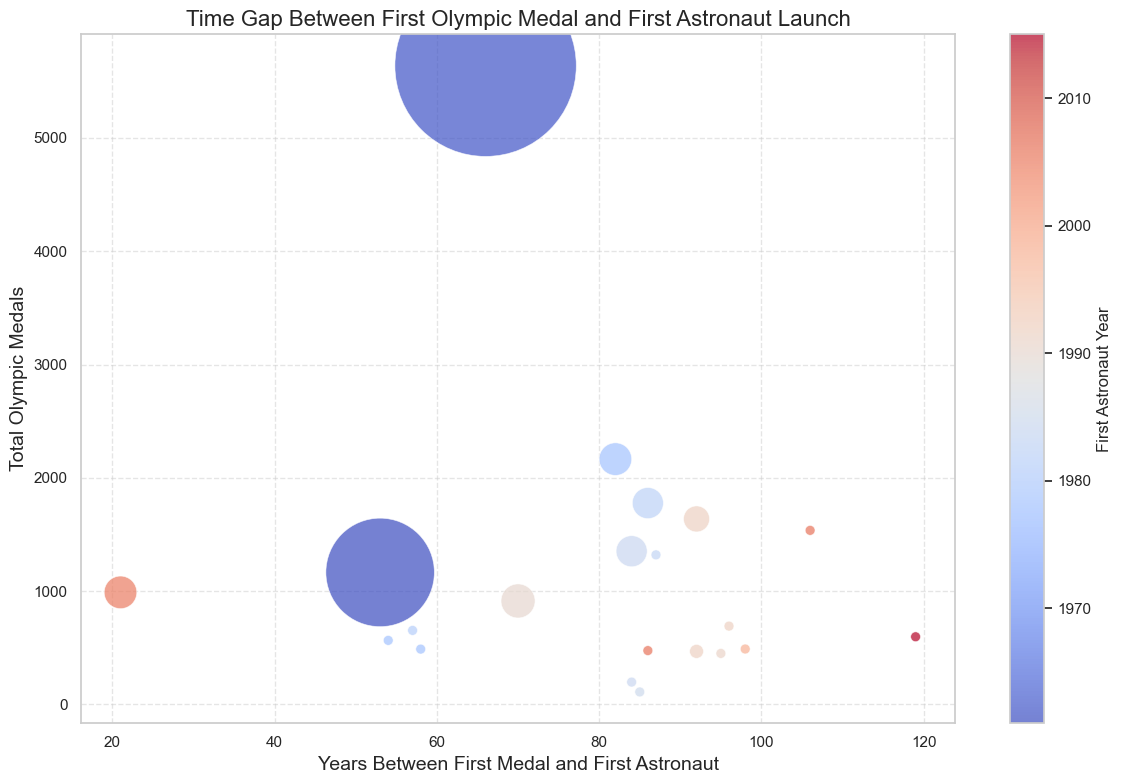

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute gap between first astronaut launch and first Olympic medal
merged_df['Gap_Years'] = merged_df['First_Astronaut_Year'] - merged_df['First_Medal_Year']

# Filter out countries with missing data
gap_df = merged_df.dropna(subset=['Gap_Years', 'Medal_Count', 'Astronaut_Count'])

plt.figure(figsize=(12, 8))

# Scatter plot: x = Gap, y = Medal Count, bubble = Astronaut Count
plt.scatter(
    gap_df['Gap_Years'],
    gap_df['Medal_Count'],
    s=gap_df['Astronaut_Count'] * 50,  # scale bubble size
    alpha=0.7,
    c=gap_df['First_Astronaut_Year'],
    cmap='coolwarm',
    edgecolors='w',
    linewidth=0.5
)

# Labels and title
plt.title('Time Gap Between First Olympic Medal and First Astronaut Launch', fontsize=16)
plt.xlabel('Years Between First Medal and First Astronaut', fontsize=14)
plt.ylabel('Total Olympic Medals', fontsize=14)

# Colorbar for first astronaut year
cbar = plt.colorbar()
cbar.set_label('First Astronaut Year', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Accuracy: 0.40

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.25      1.00      0.40         1

    accuracy                           0.40         5
   macro avg       0.62      0.62      0.40         5
weighted avg       0.85      0.40      0.40         5


Confusion Matrix:
[[1 3]
 [0 1]]


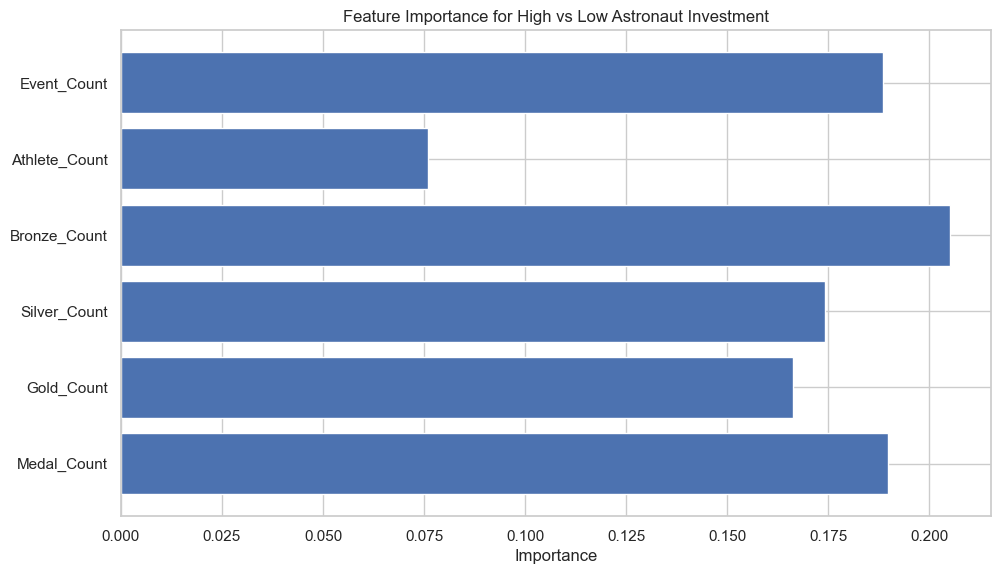

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# --- Step 1: Prepare Data ---
# Features (excluding First_Olympic_Year)
features = ['Medal_Count', 'Gold_Count', 'Silver_Count', 'Bronze_Count', 
            'Athlete_Count', 'Event_Count']
X = merged_df[features]

# Target: High (1) if Astronaut_Count > 1, Low (0) otherwise
y = (merged_df['Astronaut_Count'] > 1).astype(int)

# Fill missing values
X = X.fillna(0)
y = y.fillna(0)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 2: Scale Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 3: Train Random Forest Classifier ---
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# --- Step 4: Predict & Evaluate ---
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# --- Step 5: Feature Importance ---
importances = clf.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance for High vs Low Astronaut Investment")
plt.show()


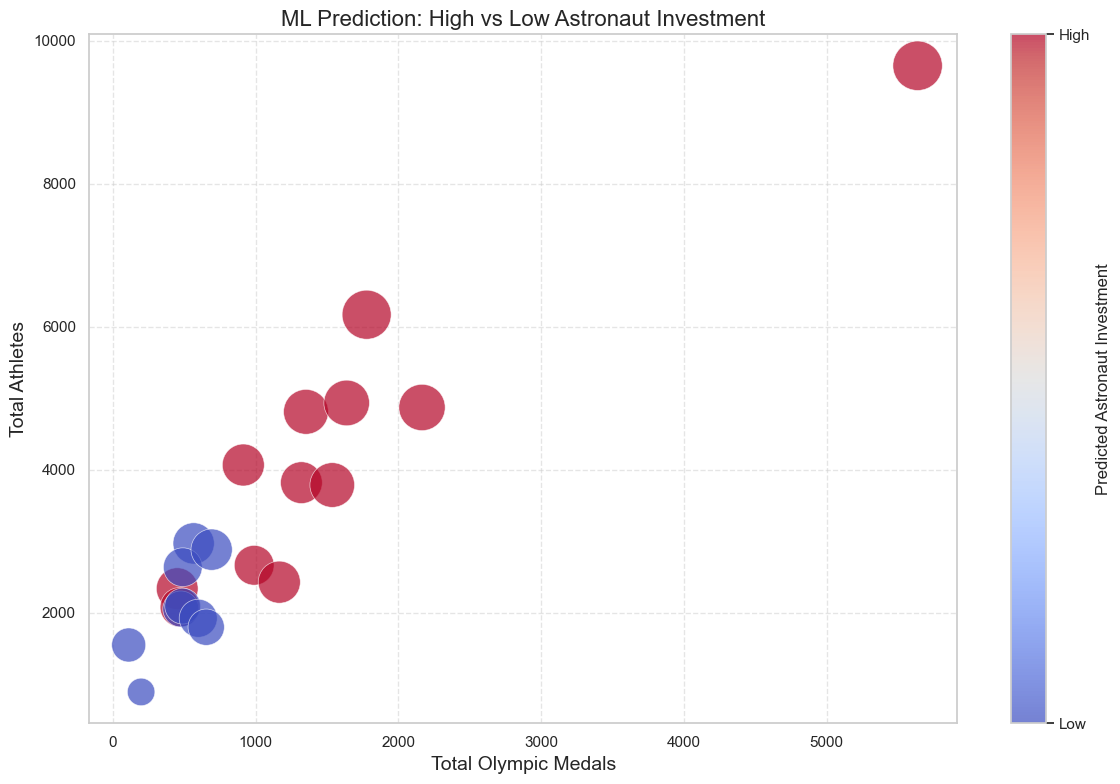

In [91]:
import matplotlib.pyplot as plt

# Predict probabilities (optional) for color intensity
merged_df['Predicted_High'] = clf.predict(scaler.transform(merged_df[features]))

plt.figure(figsize=(12, 8))

# Scatter plot
scatter = plt.scatter(
    merged_df['Medal_Count'],
    merged_df['Athlete_Count'],
    s=merged_df['Event_Count'] * 2,  # scale bubble size
    c=merged_df['Predicted_High'],   # color by ML prediction
    cmap='coolwarm',
    alpha=0.7,
    edgecolors='w',
    linewidth=0.5
)

# Labels and title
plt.xlabel("Total Olympic Medals", fontsize=14)
plt.ylabel("Total Athletes", fontsize=14)
plt.title("ML Prediction: High vs Low Astronaut Investment", fontsize=16)

# Colorbar for prediction
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.set_label("Predicted Astronaut Investment", fontsize=12)
cbar.set_ticklabels(['Low', 'High'])

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


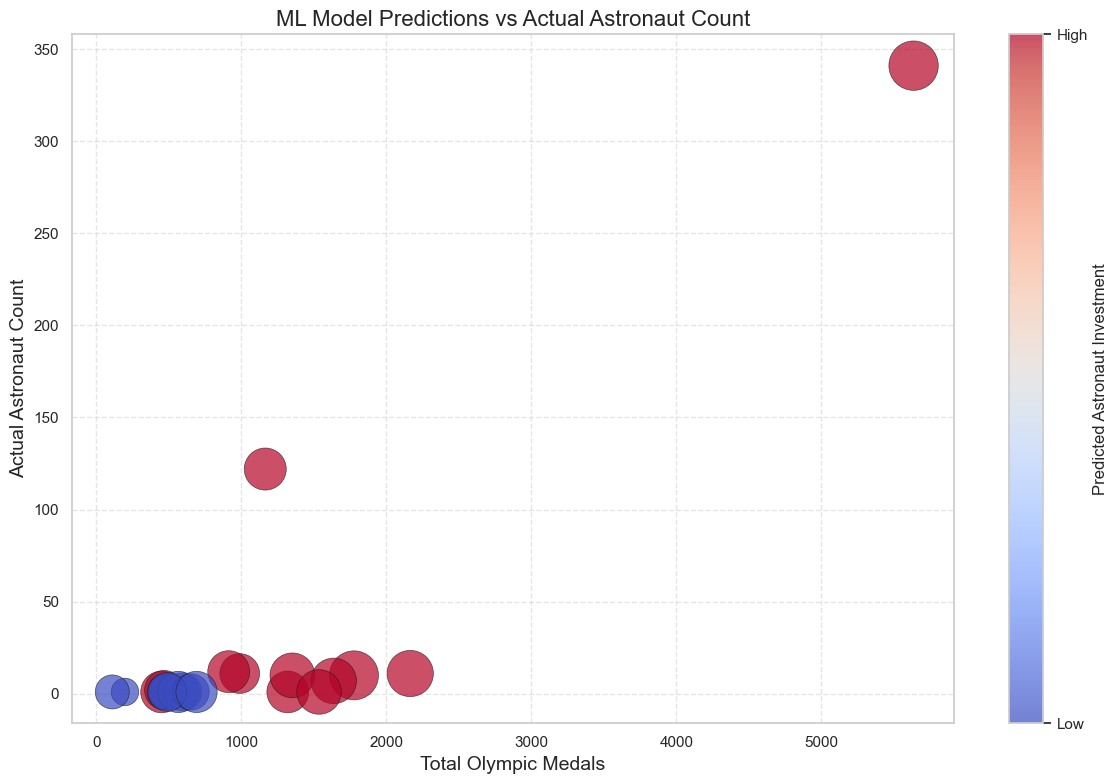

In [95]:
import matplotlib.pyplot as plt

# Actual astronaut count
merged_df['Predicted_High'] = clf.predict(scaler.transform(merged_df[features]))

plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    merged_df['Medal_Count'],
    merged_df['Astronaut_Count'],
    s=merged_df['Event_Count']*2,      # bubble size
    c=merged_df['Predicted_High'],     # color by model prediction
    cmap='coolwarm',
    alpha=0.7,
    edgecolors='k',
    linewidth=0.5
)

# Labels and title
plt.xlabel("Total Olympic Medals", fontsize=14)
plt.ylabel("Actual Astronaut Count", fontsize=14)
plt.title("ML Model Predictions vs Actual Astronaut Count", fontsize=16)

# Colorbar for prediction
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.set_label("Predicted Astronaut Investment", fontsize=12)
cbar.set_ticklabels(['Low', 'High'])

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


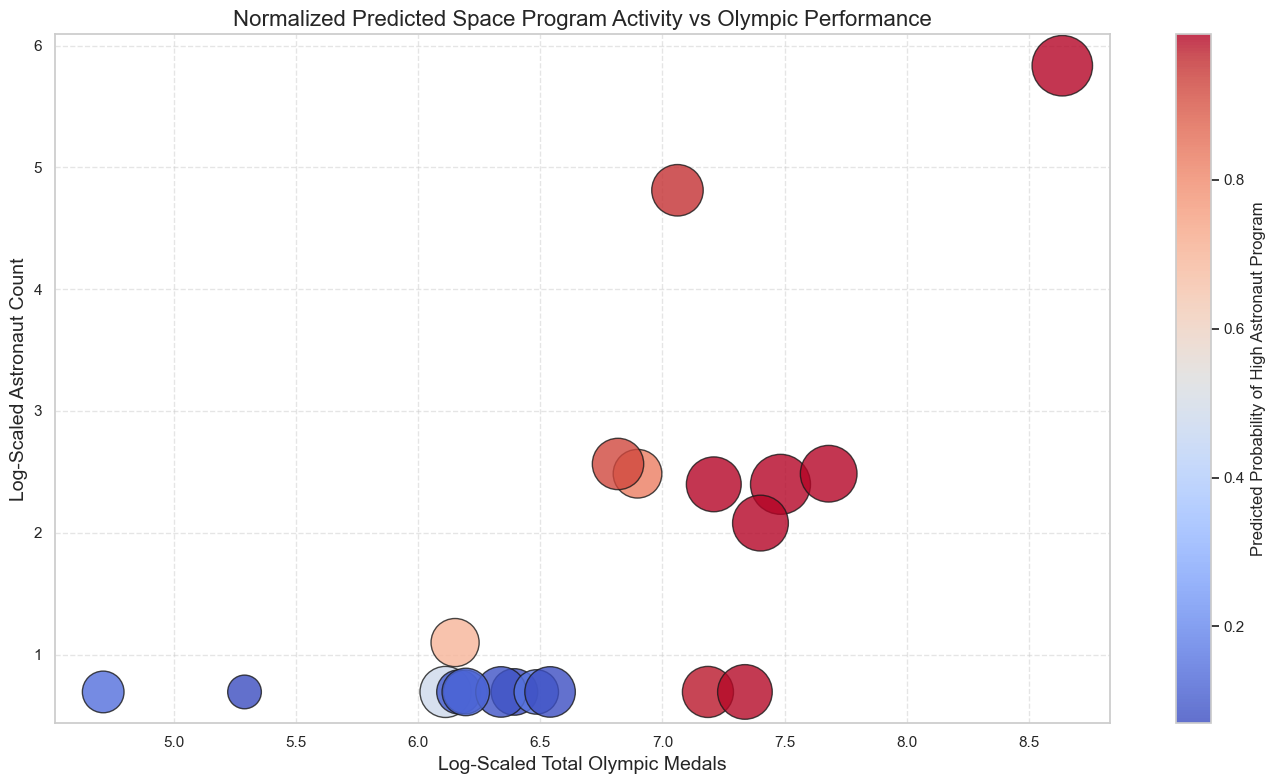

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Predicted probability of High astronaut program
pred_probs = clf.predict_proba(scaler.transform(merged_df[features]))[:,1]
merged_df['Predicted_Prob'] = pred_probs

plt.figure(figsize=(14,8))

# Apply log scaling to X and Y to normalize outlier effect
x = np.log1p(merged_df['Medal_Count'])        # log(1 + medals)
y = np.log1p(merged_df['Astronaut_Count'])    # log(1 + astronauts)

plt.scatter(
    x, 
    y, 
    s=merged_df['Event_Count']*3,             # bubble size = Olympic events
    c=merged_df['Predicted_Prob'],            # color = model prediction probability
    cmap='coolwarm', alpha=0.8, edgecolors='k'
)

# Colorbar
cbar = plt.colorbar()
cbar.set_label("Predicted Probability of High Astronaut Program", fontsize=12)

# Labels and title
plt.xlabel("Log-Scaled Total Olympic Medals", fontsize=14)
plt.ylabel("Log-Scaled Astronaut Count", fontsize=14)
plt.title("Normalized Predicted Space Program Activity vs Olympic Performance", fontsize=16)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


=== Classification Report ===

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.33      1.00      0.50         1

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5

Accuracy: 0.60

=== Confusion Matrix ===
[[2 2]
 [0 1]]

=== Feature Importances ===
         Feature  Importance
0    Medal_Count    0.204456
5    Event_Count    0.195709
3   Bronze_Count    0.193186
1     Gold_Count    0.170011
2   Silver_Count    0.169396
4  Athlete_Count    0.067242


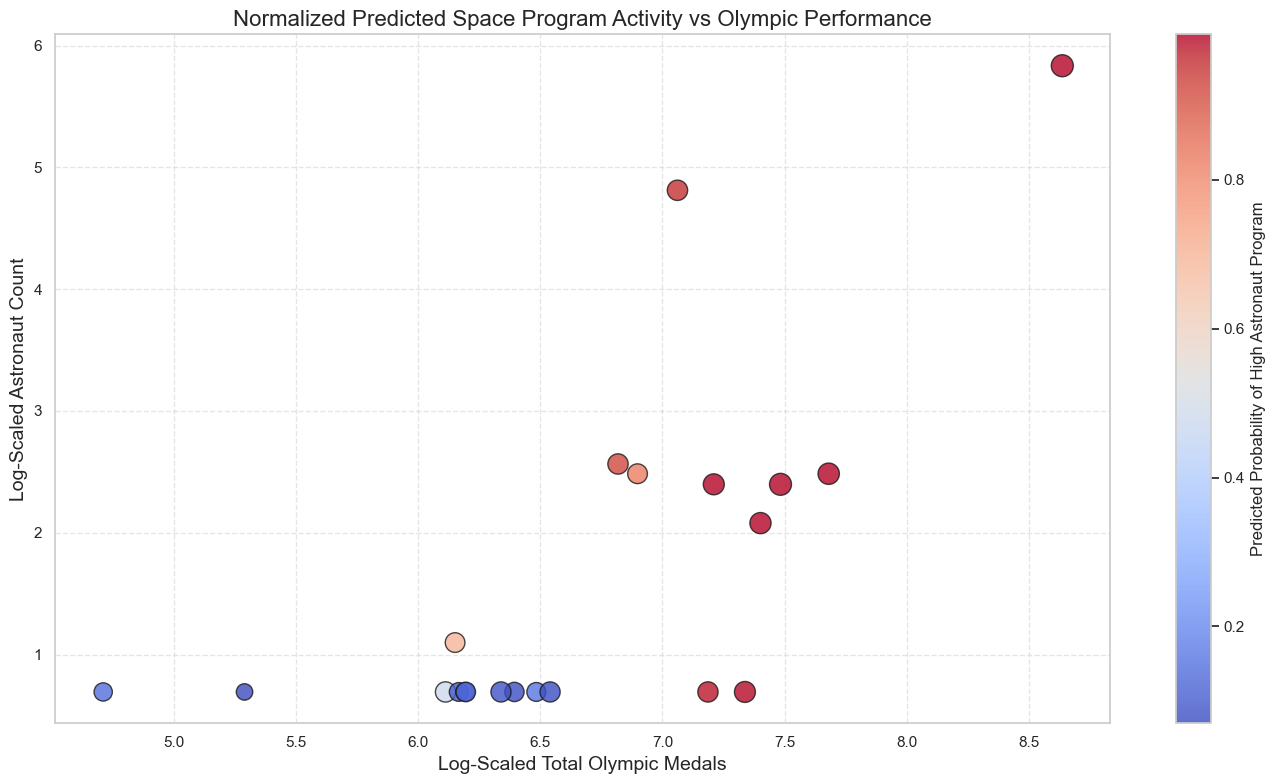

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Define High vs Low astronaut program ---
merged_df['Astronaut_HighLow'] = (merged_df['Astronaut_Count'] > 1).astype(int)

# --- Step 2: Features ---
features = ['Medal_Count', 'Gold_Count', 'Silver_Count', 'Bronze_Count',
            'Athlete_Count', 'Event_Count']
X = merged_df[features].fillna(0)
y = merged_df['Astronaut_HighLow']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 3: Train Random Forest Classifier ---
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train_scaled, y_train)

# --- Step 4: Model Predictions ---
y_pred = clf.predict(X_test_scaled)
y_prob = clf.predict_proba(X_test_scaled)[:,1]

# --- Step 5: Print Model Stats ---
print("=== Classification Report ===\n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

cm = confusion_matrix(y_test, y_pred)
print("=== Confusion Matrix ===")
print(cm)

# Feature importance
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("\n=== Feature Importances ===")
print(feature_importance_df)

# --- Step 6: Bubble Plot ---
merged_df['Predicted_Prob'] = clf.predict_proba(scaler.transform(merged_df[features]))[:,1]

x = np.log1p(merged_df['Medal_Count'])
y = np.log1p(merged_df['Astronaut_Count'])
bubble_size = np.sqrt(merged_df['Event_Count'])*10  # normalized bubble size

plt.figure(figsize=(14,8))
plt.scatter(
    x, 
    y, 
    s=bubble_size, 
    c=merged_df['Predicted_Prob'], 
    cmap='coolwarm', alpha=0.8, edgecolors='k'
)
plt.colorbar(label="Predicted Probability of High Astronaut Program")
plt.xlabel("Log-Scaled Total Olympic Medals", fontsize=14)
plt.ylabel("Log-Scaled Astronaut Count", fontsize=14)
plt.title("Normalized Predicted Space Program Activity vs Olympic Performance", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
